<a href="https://colab.research.google.com/github/Badal3375/student_performance/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop('math score', axis=1)
y = df['math score']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
541,1,3,0,0,0,82,80
440,0,2,4,1,0,81,79
482,1,2,4,0,1,68,61
422,0,3,3,0,0,58,67
778,0,0,4,1,0,79,82
...,...,...,...,...,...,...,...
106,0,3,3,1,1,100,100
270,1,2,1,1,1,63,61
860,0,2,0,1,1,62,53
435,1,2,4,0,0,48,53


In [ ]:
y_train

,math score
541,79
440,67
482,68
422,47
778,72
...,...
106,87
270,69
860,53
435,50


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

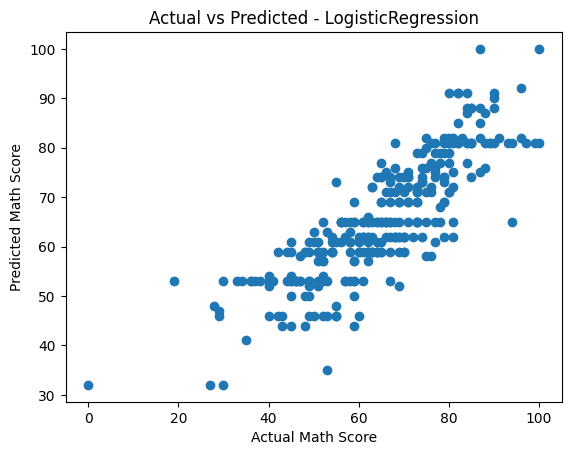

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title(f'Actual vs Predicted - {model.__class__.__name__}')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train and evaluate Decision Tree Regressor
train_evaluate_model(DecisionTreeRegressor(random_state=42), X_train, y_train, X_test, y_test)

Model: DecisionTreeRegressor
Mean Squared Error: 67.54
Mean Absolute Error: 6.61
R2 Score: 0.73


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train and evaluate Linear Regression
train_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)

Model: LinearRegression
Mean Squared Error: 31.61
Mean Absolute Error: 4.44
R2 Score: 0.87


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train and evaluate Random Forest Regressor
train_evaluate_model(RandomForestRegressor(random_state=42, n_estimators=100), X_train, y_train, X_test, y_test)

Model: RandomForestRegressor
Mean Squared Error: 38.72
Mean Absolute Error: 4.92
R2 Score: 0.84


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})

display(feature_scores.sort_values(by='Score', ascending=False))

,Feature,Score
5,reading score,2011.981555
6,writing score,1807.216666
3,lunch,140.118842
1,race/ethnicity,49.038736
4,test preparation course,32.542648
0,gender,28.979336
2,parental level of education,4.674527


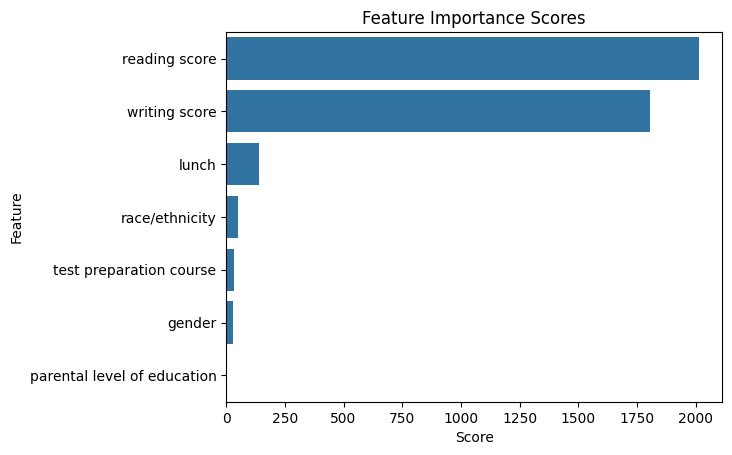

In [ ]:
sns.barplot(x='Score', y='Feature', data=feature_scores.sort_values(by='Score', ascending=False))
plt.title('Feature Importance Scores')
plt.show()

In [ ]:
print(feature_scores.sort_values(by='Score', ascending=False))

                       Feature        Score
5                reading score  2011.981555
6                writing score  1807.216666
3                        lunch   140.118842
1               race/ethnicity    49.038736
4      test preparation course    32.542648
0                       gender    28.979336
2  parental level of education     4.674527
